In [1]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

In [2]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

┌───┐ ░                                       ░                    »
   q_0: ┤ H ├─░─────■──────■─────────────■────────────░──────────■──────■──»
        ├───┤ ░     │    ┌─┴─┐         ┌─┴─┐          ░ ┌───┐    │    ┌─┴─┐»
   q_1: ┤ H ├─░─────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├»
        └───┘ ░ ┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘»
   q_2: ──────░─┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────»
              ░ └───────┘     └───────┘     └───────┘ ░      └───────┘     »
meas: 3/═══════════════════════════════════════════════════════════════════»
                                                                           »
«                                ░ ┌───┐                                     »
«   q_0: ───────────■────────────░─┤ X ├────■──────■─────────────■───────────»
«                 ┌─┴─┐          ░ ├───┤    │    ┌─┴─┐         ┌─┴─┐         »
«   q_1: ────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├────■────┤ X ├────■────»
«        ┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐»
«   q_2: ┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├»
«        └───────┘     └───────┘ ░      └───────┘     └───────┘     └───────┘»
«meas: 3/════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░                                            ░ ┌─┐      
«   q_0: ─░──────────■──────■─────────────■────────────░─┤M├──────
«         ░ ┌───┐    │    ┌─┴─┐         ┌─┴─┐          ░ └╥┘┌─┐   
«   q_1: ─░─┤ X ├────┼────┤ X ├────■────┤ X ├────■─────░──╫─┤M├───
«         ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░  ║ └╥┘┌─┐
«   q_2: ─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──╫──╫─┤M├
«         ░      └───────┘     └───────┘     └───────┘ ░  ║  ║ └╥┘
«meas: 3/═════════════════════════════════════════════════╩══╩══╩═
«                                                         0  1  2

{'001': 1056, '010': 981, '011': 1009, '000': 1050}


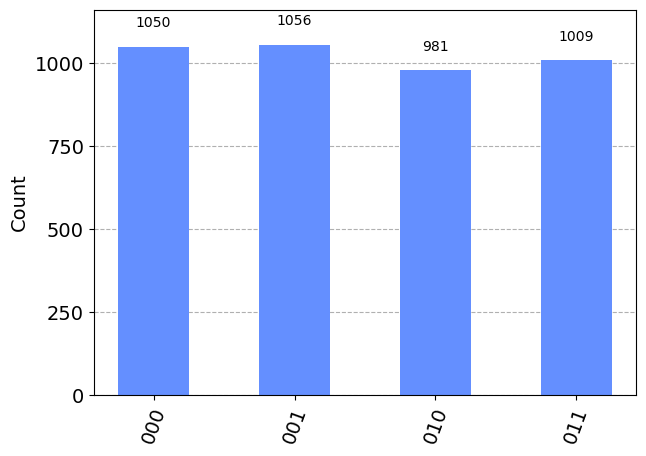

In [3]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [4]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw()

┌───┐ ░                                              ░                 »
   q_0: ┤ H ├─░──────■───────■────────────────■──────────────░───────────■─────»
        ├───┤ ░      │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     »
   q_1: ┤ H ├─░──────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────»
        └───┘ ░ ┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐»
   q_2: ──────░─┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├»
              ░ └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘»
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                          ░ ┌───┐                            »
«   q_0: ──■────────────────■──────────────░─┤ X ├─────■───────■──────────────»
«        ┌─┴─┐            ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            »
«   q_1: ┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────»
«        └───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐»
«   q_2: ─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├»
«             └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘»
«meas: 3/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                         ░                                                  »
«   q_0: ──■──────────────░───────────■───────■────────────────■─────────────»
«        ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐           »
«   q_1: ┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■─────»
«        └───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐»
«   q_2: ─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├»
«             └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘»
«meas: 3/════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░ ┌─┐      
«   q_0: ─░─┤M├──────
«         ░ └╥┘┌─┐   
«   q_1: ─░──╫─┤M├───
«         ░  ║ └╥┘┌─┐
«   q_2: ─░──╫──╫─┤M├
«         ░  ║  ║ └╥┘
«meas: 3/════╩══╩══╩═
«            0  1  2

{'110': 1006, '111': 1014, '101': 1046, '100': 1030}


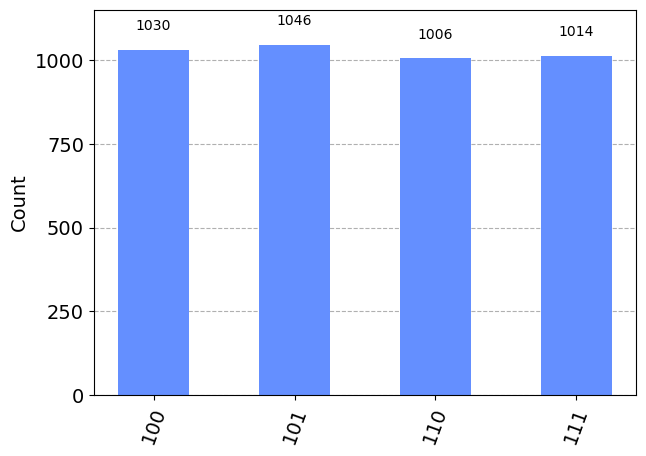

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc1 = transpile(qc1, aer_sim)
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

In [6]:
theta = pi/4  # all pixels white
qc2 = qk.QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()
#Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()
#Pixel 2

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)


qc2.barrier()

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw()

┌───┐ ░                                              ░                 »
   q_0: ┤ H ├─░──────■───────■────────────────■──────────────░───────────■─────»
        ├───┤ ░      │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     »
   q_1: ┤ H ├─░──────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────»
        └───┘ ░ ┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐»
   q_2: ──────░─┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├»
              ░ └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘»
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                          ░ ┌───┐                            »
«   q_0: ──■────────────────■──────────────░─┤ X ├─────■───────■──────────────»
«        ┌─┴─┐            ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            »
«   q_1: ┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────»
«        └───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐»
«   q_2: ─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├»
«             └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘»
«meas: 3/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                         ░                                                  »
«   q_0: ──■──────────────░───────────■───────■────────────────■─────────────»
«        ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐           »
«   q_1: ┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■─────»
«        └───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐»
«   q_2: ─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├»
«             └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘»
«meas: 3/════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░ ┌─┐      
«   q_0: ─░─┤M├──────
«         ░ └╥┘┌─┐   
«   q_1: ─░──╫─┤M├───
«         ░  ║ └╥┘┌─┐
«   q_2: ─░──╫──╫─┤M├
«         ░  ║  ║ └╥┘
«meas: 3/════╩══╩══╩═
«            0  1  2

{'010': 534, '110': 519, '111': 465, '000': 490, '100': 499, '001': 539, '011': 514, '101': 536}


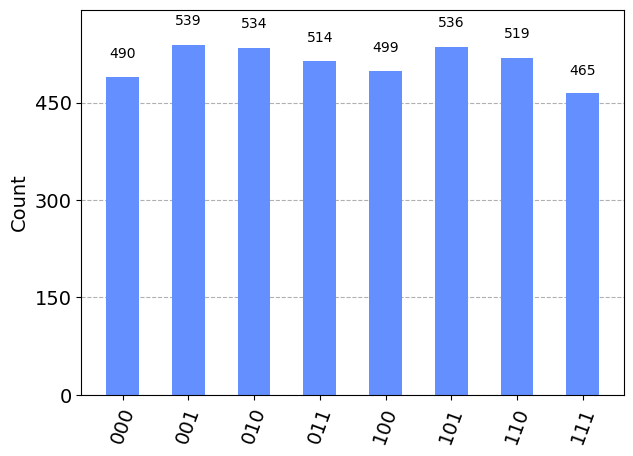

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc2 = transpile(qc2, aer_sim)
qobj = assemble(t_qc2, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc2)
print(counts)
plot_histogram(counts)

In [8]:
print("Depth : ", qc1.depth())
print("Operations: ", qc1.count_ops())

Depth :  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


In [9]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw()

┌─────────────┐ ░                                          »
   q_0: ┤ U3(π/2,0,π) ├─░──────────────────■────────────────────■──»
        ├─────────────┤ ░                  │                    │  »
   q_1: ┤ U3(π/2,0,π) ├─░──────────────────┼────────────────────┼──»
        └─────────────┘ ░ ┌─────────────┐┌─┴─┐┌──────────────┐┌─┴─┐»
   q_2: ────────────────░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├»
                        ░ └─────────────┘└───┘└──────────────┘└───┘»
meas: 3/═══════════════════════════════════════════════════════════»
                                                                   »
«                                                                     »
«   q_0: ───────■────────────────────────────────────────■────────────»
«             ┌─┴─┐                                    ┌─┴─┐          »
«   q_1: ─────┤ X ├────────■───────────────────■───────┤ X ├───────■──»
«        ┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐»
«   q_2: ┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├»
«        └──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘»
«meas: 3/═════════════════════════════════════════════════════════════»
«                                                                     »
«                              ░                                          »
«   q_0: ──────────────────────░──────────────────■────────────────────■──»
«                              ░  ┌───────────┐   │                    │  »
«   q_1: ──────────────────■───░──┤ U3(π,0,π) ├───┼────────────────────┼──»
«        ┌──────────────┐┌─┴─┐ ░ ┌┴───────────┴┐┌─┴─┐┌──────────────┐┌─┴─┐»
«   q_2: ┤ U3(-π/4,0,0) ├┤ X ├─░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├»
«        └──────────────┘└───┘ ░ └─────────────┘└───┘└──────────────┘└───┘»
«meas: 3/═════════════════════════════════════════════════════════════════»
«                                                                         »
«                                                                     »
«   q_0: ───────■────────────────────────────────────────■────────────»
«             ┌─┴─┐                                    ┌─┴─┐          »
«   q_1: ─────┤ X ├────────■───────────────────■───────┤ X ├───────■──»
«        ┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐»
«   q_2: ┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├»
«        └──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘»
«meas: 3/═════════════════════════════════════════════════════════════»
«                                                                     »
«                              ░  ┌───────────┐                           »
«   q_0: ──────────────────────░──┤ U3(π,0,π) ├───■────────────────────■──»
«                              ░  ├───────────┤   │                    │  »
«   q_1: ──────────────────■───░──┤ U3(π,0,π) ├───┼────────────────────┼──»
«        ┌──────────────┐┌─┴─┐ ░ ┌┴───────────┴┐┌─┴─┐┌──────────────┐┌─┴─┐»
«   q_2: ┤ U3(-π/4,0,0) ├┤ X ├─░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├»
«        └──────────────┘└───┘ ░ └─────────────┘└───┘└──────────────┘└───┘»
«meas: 3/═════════════════════════════════════════════════════════════════»
«                                                                         »
«                                                                     »
«   q_0: ───────■────────────────────────────────────────■────────────»
«             ┌─┴─┐                                    ┌─┴─┐          »
«   q_1: ─────┤ X ├────────■───────────────────■───────┤ X ├───────■──»
«        ┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐»
«   q_2: ┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├»
«        └──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘»
«meas: 3/═════════════════════════════════════════════════════════════»
«                                                                     »
«                              ░                                          »

In [10]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


In [11]:
from qiskit.test.mock import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

C:\Users\Joker\AppData\Local\Temp\ipykernel_11412\184118217.py:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeAthens


gates =  OrderedDict([('rz', 58), ('sx', 55), ('cx', 51), ('barrier', 5), ('x', 5), ('measure', 3)])
depth =  146


In [13]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

intensity_0: 
             
intensity_1: 
             
intensity_2: 
             
intensity_3: 
             
intensity_4: 
             
intensity_5: 
             
intensity_6: 
             
intensity_7: 
             
      idx_0: 
             
      idx_1: 
             
      cr: 10/

In [14]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()

# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()

# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()

# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()

# Encode the third pixel whose value is (10101010):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░      ┌───┐          »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      └─┬─┘          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │                  ░        │            »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │  ┌───┐     »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  └─┬─┘┌───┐»
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │    │  └─┬─┘»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼────┼──»
             ├───┤ ░ ├───┤ ░        │    │    │        ░        │    │    │  »
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░────────■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ ┌───┐  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░ └───┘               »
      cr: 10/════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ ┌───┐                                    ░ ┌─┐         »
«intensity_0: ──────░─┤ X ├────────────────────────────────────░─┤M├─────────»
«                   ░ └─┬─┘┌───┐                               ░ └╥┘┌─┐      »
«intensity_1: ──────░───┼──┤ X ├───────────────────────────────░──╫─┤M├──────»
«                   ░   │  └─┬─┘┌───┐                          ░  ║ └╥┘┌─┐   »
«intensity_2: ──────░───┼────┼──┤ X ├──────────────────────────░──╫──╫─┤M├───»
«                   ░   │    │  └─┬─┘┌───┐                     ░  ║  ║ └╥┘┌─┐»
«intensity_3: ──────░───┼────┼────┼──┤ X ├─────────────────────░──╫──╫──╫─┤M├»
«                   ░   │    │    │  └─┬─┘┌───┐                ░  ║  ║  ║ └╥┘»
«intensity_4: ──────░───┼────┼────┼────┼──┤ X ├────────────────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │  └─┬─┘┌───┐           ░  ║  ║  ║  ║ »
«intensity_5: ──────░───┼────┼────┼────┼────┼──┤ X ├───────────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │  └─┬─┘┌───┐      ░  ║  ║  ║  ║ »
«intensity_6: ──────░───┼────┼────┼────┼────┼────┼──┤ X ├──────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │    │  └─┬─┘┌───┐ ░  ║  ║  ║  ║ »
«intensity_7: ──────░───┼────┼────┼────┼────┼────┼────┼──┤ X ├─░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │    │    │  └─┬─┘ ░  ║  ║  ║  ║ »
«      idx_0: ──────░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫─»
«             ┌───┐ ░   │    │    │    │    │    │    │    │   ░  ║  ║  ║  ║ »
«      idx_1: ┤ X ├─░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫─»
«             └───┘ ░                                          ░  ║  ║  ║  ║ »
«      cr: 10/════════════════════════════════════════════════════╩══╩══╩══╩═»
«                                                                 0  1  2  3 »
«                               
«intensity_0: ──────────────────
«                               
«intensity_1: ──────────────────
«                               
«intensity_2: ──────────────────
«                               
«intensity_3: ──────────────────
«             ┌─┐               
«intensity_4: ┤M├───────────────
«             └╥┘┌─┐            
«intensity_5: ─╫

In [15]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  148
Circuit size:  244


OrderedDict([('cx', 84),
             ('t', 56),
             ('tdg', 42),
             ('h', 28),
             ('id', 18),
             ('measure', 10),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'1111111111': 2023, '0000000000': 2007, '1000000000': 2065, '0100000000': 2097}


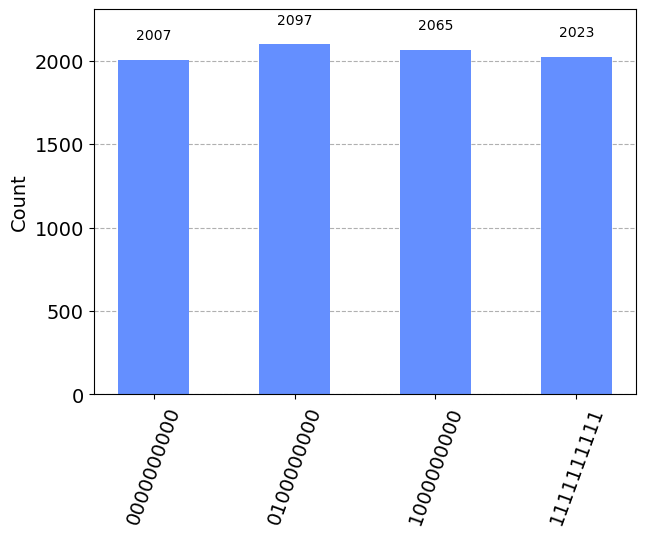

In [16]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)